### Data exploratory analysis

In [2]:
import pandas as pd
import numpy as np

In [3]:
url = r'https://raw.githubusercontent.com/MSI17819/Berlin_bike_theft_prediction/main/Berlin_bike_thief_file_for_analysis.csv'

df = pd.read_csv(url, sep=',', encoding="utf-8")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31816 entries, 0 to 31815
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Record_date              31816 non-null  object
 1   Record_day               31816 non-null  int64 
 2   Record_month             31816 non-null  int64 
 3   Record_year              31816 non-null  int64 
 4   Stealing_date            31816 non-null  object
 5   Stealing_hour            31816 non-null  int64 
 6   Report_stealing_date     31816 non-null  object
 7   Report_stealing_hour     31816 non-null  int64 
 8   Berlin_code_area         31816 non-null  int64 
 9   Bike_value               31816 non-null  int64 
 10  Unsuccesful_attempt      31816 non-null  object
 11  Bike_type                31816 non-null  object
 12  Crime_type               31816 non-null  object
 13  Crime_reason             31816 non-null  object
 14  Administrative_district  31816 non-nul

#### Creat DataFrame copy for next visualisation analysis

In [12]:
df_copy = df.copy()

#### Display DataFrame copy

In [13]:
df_copy

,Record_date,Record_day,Record_month,Record_year,Stealing_date,Stealing_hour,Report_stealing_date,Report_stealing_hour,Berlin_code_area,Bike_value,Unsuccesful_attempt,Bike_type,Crime_type,Crime_reason,Administrative_district,District,Quarter,Street_name
0,2022-07-31,31,7,2022,2022-07-31,1,2022-07-31,3,7100204,1739,No,Men,Theft,Aggravated theft,Tempelhof-Schöneberg,Schöneberg Nord,Schöneberg Nordost,Barbarossaplatz
1,2022-07-31,31,7,2022,2022-07-30,16,2022-07-30,17,9200715,650,No,Men,Theft,Aggravated theft,Treptow-Köpenick,Treptow-Köpenick 2,Adlershof,Wista
2,2022-07-31,31,7,2022,2022-07-30,23,2022-07-31,11,3200308,839,No,Men,Theft,Aggravated theft,Pankow,Nördliches Pankow,Buchholz,Nisbléstraße
3,2022-07-31,31,7,2022,2022-07-29,18,2022-07-31,16,6100103,665,No,Bike,Theft,Aggravated theft,Steglitz-Zehlendorf,Steglitz,Schloßstraße,Markelstraße
4,2022-07-31,31,7,2022,2022-07-31,16,2022-07-31,17,9100408,550,No,Women,Theft,Aggravated theft,Treptow-Köpenick,Treptow-Köpenick 1,Johannisthal,Johannisthal Ost
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31811,2021-01-02,2,1,2021,2021-01-02,13,2021-01-02,13,8401243,1700,No,Men,Theft,Aggravated theft,Neukölln,Buckow Nord/Rudow,Rudow,Alt-Rudow
31812,2021-01-01,1,1,2021,2021-01-01,9,2021-01-01,11,4200206,290,No,Women,Theft,Aggravated theft,Charlottenburg-Wilmersdorf,Charlottenburg West,Heerstraße,Kranzallee
31813,2021-01-01,1,1,2021,2021-01-01,20,2021-01-01,20,2100104,2800,No,Men,Theft,Aggravated theft,Friedrichshain-Kreuzberg,Kreuzberg Nord,Südliche Friedrichstadt,Moritzplatz
31814,2021-01-01,1,1,2021,2021-01-01,17,2021-01-01,18,8401241,888,No,Bike,Theft,Theft,Neukölln,Buckow Nord/Rudow,Rudow,Blumenviertel


#### Change Record_day column for verbal day representation 

In [14]:
df_copy['Record_day'] = pd.to_datetime(df_copy['Record_date']).dt.day_name()

In [15]:
df_copy.groupby('Record_day')[['Record_date']].count().sort_values(by='Record_date', ascending=False)

,Record_date
Record_day,
Monday,5436
Tuesday,5092
Wednesday,5061
Thursday,4789
Friday,4373
Sunday,3706
Saturday,3359


<AxesSubplot:title={'center':'Amount of crimes by Day of Week'}, ylabel='Day of week'>

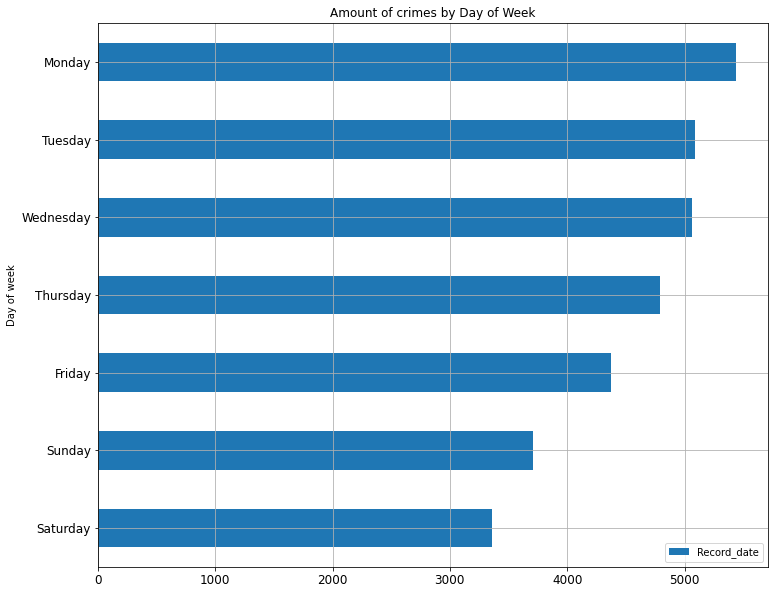

In [20]:
df_copy.groupby('Record_day')[['Record_date']].count()\
                .sort_values(by='Record_date', ascending=True)\
                .plot(kind='barh',
                figsize=(12,10),
                fontsize=12,
                title='Amount of crimes by Day of Week',
                xlabel='Day of week',
                grid=True)

In [17]:
df_copy.groupby('Administrative_district')[['Record_date']].count().sort_values(by=['Record_date'], ascending=False)

,Record_date
Administrative_district,
Pankow,5015
Mitte,4482
Friedrichshain-Kreuzberg,4377
Charlottenburg-Wilmersdorf,3479
Tempelhof-Schöneberg,2659
Treptow-Köpenick,2494
Neukölln,2479
Steglitz-Zehlendorf,2019
Lichtenberg,1783


<AxesSubplot:title={'center':'Amount of crimes by Administrative districte'}, ylabel='Administrative district'>

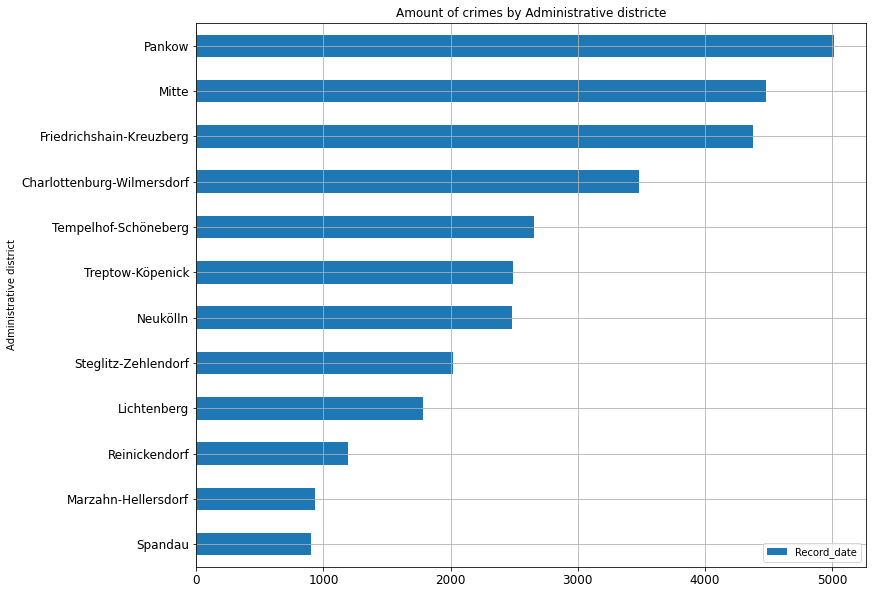

In [25]:
df_copy.groupby('Administrative_district')[['Record_date']].count()\
                                    .sort_values(by=['Record_date'], ascending=True)\
                                    .plot(kind='barh',
                                    figsize=(12,10),
                                    fontsize=12,
                                    title='Amount of crimes by Administrative districte',
                                    xlabel='Administrative district',
                                    grid=True)

In [22]:
df_copy.groupby('Bike_type')[['Record_date']].count().sort_values(by='Record_date', ascending=False)

,Record_date
Bike_type,
Men,14649
Women,9298
Bike,4724
Mountain,1399
Child,1262
Racing,437
Cargo,47


In [21]:
df_copy.groupby('Crime_type')[['Record_date']].count().sort_values(by='Record_date', ascending=False)

,Record_date
Crime_type,
Theft,30437
Break-in,1379
